Decision Tree RMSE (CV): 0.0033366216358598987
Random Forest RMSE (CV): 0.0032453277626084665
Linear Regression RMSE (CV): 0.018338285853509377


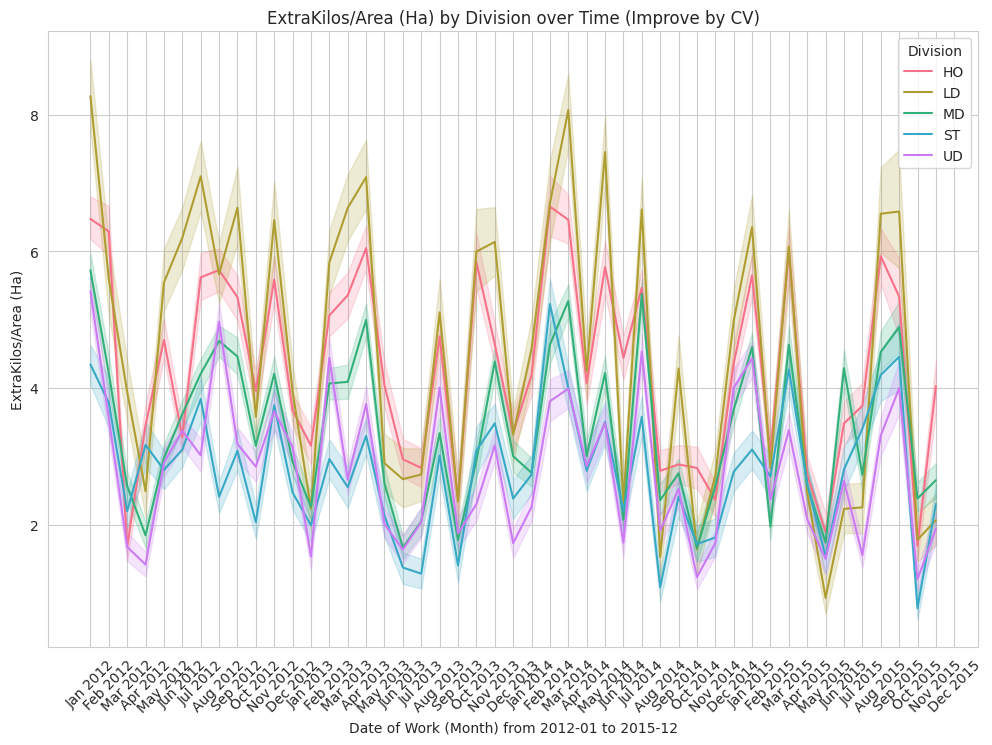

In [5]:
# Import additional libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score  # Add this line for cross_val_score
from sklearn.preprocessing import LabelEncoder


# Load the dataset
df = pd.read_csv("Dataset.csv")

# Data preprocessing
# Calculate Productivity
df['Productivity'] = df['ExtraKilos'] / df['Area (Ha)']

# Convert DateofWork to datetime and extract month
df['DateofWork'] = pd.to_datetime(df['DateofWork'])

# Create a new column for month
df['Month'] = df['DateofWork'].dt.to_period('M').dt.strftime('%Y-%m')

# One-hot encode Division
df = pd.get_dummies(df, columns=['Division'])

# Initialize variables for evaluation
division_columns = [col for col in df.columns if col.startswith('Division')]
X = df[['Productivity'] + division_columns]
y = df['Productivity']  # Change the target variable to 'Productivity'

# Initialize lists to store evaluation results
decision_tree_rmse = []
random_forest_rmse = []
linear_regression_rmse = []

# Perform Cross-Validation and model evaluation
cv = 5

# Decision Tree
dt_cv_scores = cross_val_score(DecisionTreeRegressor(), X, y, scoring='neg_mean_squared_error', cv=cv)
decision_tree_rmse_cv = np.sqrt(-dt_cv_scores)

# Random Forest
rf_cv_scores = cross_val_score(RandomForestRegressor(), X, y, scoring='neg_mean_squared_error', cv=cv)
random_forest_rmse_cv = np.sqrt(-rf_cv_scores)

# Linear Regression
lr_cv_scores = cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=cv)
linear_regression_rmse_cv = np.sqrt(-lr_cv_scores)

# Evaluate and compare models with Cross-Validation
print("Decision Tree RMSE (CV):", np.mean(decision_tree_rmse_cv))
print("Random Forest RMSE (CV):", np.mean(random_forest_rmse_cv))
print("Linear Regression RMSE (CV):", np.mean(linear_regression_rmse_cv))

# Visualize ExtraKilos/Area (Ha) by Division over time
# Create a line plot for each division

# Define the date range from January 2012 to December 2015
start_date = pd.to_datetime("2012-01-01")
end_date = pd.to_datetime("2015-12-31")

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("husl", len(division_columns))

# Generate month labels for the entire duration period
month_labels = [start_date + pd.DateOffset(months=i) for i in range(48)]  # 48 months from Jan 2012 to Dec 2015

for division_column in division_columns:
    division_name = division_column.split("_")[1]
    division_data = df[df[division_column] == 1]

    # Filter the data for the specified date range
    division_data = division_data[(division_data['DateofWork'] >= start_date) & (division_data['DateofWork'] <= end_date)]
    
    sns.lineplot(data=division_data, x='Month', y='Productivity', label=division_name)

plt.xlabel('Date of Work (Month) from 2012-01 to 2015-12')
plt.xticks(range(len(month_labels)), [label.strftime('%b %Y') for label in month_labels], rotation=45)
plt.ylabel('ExtraKilos/Area (Ha)')
plt.title('ExtraKilos/Area (Ha) by Division over Time (Improve by CV)')
plt.legend(title='Division')

plt.savefig('ExtraKilos-Area (Ha) by Division over Time(Improve by CV).png')
plt.show()

# Summarize knowledge gained
# Discuss insights, model comparisons, and the updated visualization


In [8]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

# Cross-validation
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Decision Tree Cross-validation
dt_cv = DecisionTreeRegressor()
dt_cv_scores = cross_val_score(dt_cv, X, y, cv=5, scoring=scorer)
print("Decision Tree Cross-Validation RMSE: Mean =", np.mean(dt_cv_scores), ", Std =", np.std(dt_cv_scores))

# Random Forest Cross-validation
rf_cv = RandomForestRegressor()
rf_cv_scores = cross_val_score(rf_cv, X, y, cv=5, scoring=scorer)
print("Random Forest Cross-Validation RMSE: Mean =", np.mean(rf_cv_scores), ", Std =", np.std(rf_cv_scores))

# Linear Regression Cross-validation
lr_cv = LinearRegression()
lr_cv_scores = cross_val_score(lr_cv, X, y, cv=5, scoring=scorer)
print("Linear Regression Cross-Validation RMSE: Mean =", np.mean(lr_cv_scores), ", Std =", np.std(lr_cv_scores))




Decision Tree Cross-Validation RMSE: Mean = -0.00026461174548713946 , Std = 0.0003462897514071199
Random Forest Cross-Validation RMSE: Mean = -0.0002477974218307665 , Std = 0.0001375604061824433
Linear Regression Cross-Validation RMSE: Mean = -7.638616046525527e-28 , Std = 4.489140051470814e-28


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np


# Initialize models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr = LinearRegression()

# Initialize a scorer (e.g., Mean Squared Error, you can choose other metrics)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Evaluate models using cross-validation
dt_cv_scores = -cross_val_score(dt, X, y, cv=5, scoring=scorer)
rf_cv_scores = -cross_val_score(rf, X, y, cv=5, scoring=scorer)
lr_cv_scores = -cross_val_score(lr, X, y, cv=5, scoring=scorer)

# Print and compare the results
print("Decision Tree RMSE: Mean =", np.mean(dt_cv_scores), ", Std =", np.std(dt_cv_scores))
print("Random Forest RMSE: Mean =", np.mean(rf_cv_scores), ", Std =", np.std(rf_cv_scores))
print("Linear Regression RMSE: Mean =", np.mean(lr_cv_scores), ", Std =", np.std(lr_cv_scores))

# Additional metrics if needed (e.g., R-squared)
dt_r2_scores = cross_val_score(dt, X, y, cv=5, scoring='r2')
rf_r2_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
lr_r2_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

print("Decision Tree R-squared: Mean =", np.mean(dt_r2_scores), ", Std =", np.std(dt_r2_scores))
print("Random Forest R-squared: Mean =", np.mean(rf_r2_scores), ", Std =", np.std(rf_r2_scores))
print("Linear Regression R-squared: Mean =", np.mean(lr_r2_scores), ", Std =", np.std(lr_r2_scores))


Decision Tree RMSE: Mean = 0.00026259879601631456 , Std = 0.000347903630748269
Random Forest RMSE: Mean = 0.00023072295991186085 , Std = 0.00012362108239909083
Linear Regression RMSE: Mean = 7.638616046525527e-28 , Std = 4.489140051470814e-28
Decision Tree R-squared: Mean = 0.9999953096146583 , Std = 6.47982544799448e-06
Random Forest R-squared: Mean = 0.9999963051668317 , Std = 2.1410814171078205e-06
Linear Regression R-squared: Mean = 1.0 , Std = 0.0


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Initialize models
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
# lr = LinearRegression()  # Note: Linear Regression might not be suitable for binary classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
# lr.fit(X_train, y_train)

# Predict probabilities for positive class
y_proba_dt = dt.predict(X_test)
y_proba_rf = rf.predict(X_test)
# y_proba_lr = lr.predict(X_test)

# Assuming 'y' is binary (0 or 1)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
# fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# Calculate AUC
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_rf = auc(fpr_rf, tpr_rf)
# roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
# plt.plot(fpr_lr, tpr_lr, label=f'Linear Regression (AUC = {roc_auc_lr:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


ValueError: continuous format is not supported